### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [134]:
data = pd.read_csv('data/coupons.csv')

In [135]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [136]:
#print data types

print('Column Datatypes : ')
print(data.dtypes)

Column Datatypes : 
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [138]:
tmp=data[['destination','passanger','weather','temperature','time','coupon','Bar','CoffeeHouse','CarryAway']]
tmp.query('Bar != "never"').head()

,destination,passanger,weather,temperature,time,coupon,Bar,CoffeeHouse,CarryAway
66,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),less1,1~3,1~3
67,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,less1,1~3,1~3
68,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,less1,1~3,1~3
69,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,less1,1~3,1~3
70,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,less1,1~3,1~3


2. Investigate the dataset for missing or problematic data.

2.1 Identify empty values

In [139]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

2.2 Data Preparation
Identify the data types of each column and the data value distribution by printing all possible values.
    Trim all string data type columns for leading and trailing spaces. identify any special characters in each column value. Rename the last column 'Y' to a more meaningful label 'accepted_coupon'. Identify any duplicate rows based on all columns and remove them.


In [140]:
# removing leading and trailing characters from columns with str type
for i in data.columns:
    if isinstance(data[i],str):
        data[i] = data[i].str.strip()
    print('Column : ' + i)
    print(data[i].value_counts())
    print('\n')
    
# construct new column 'accepted_coupon' to have categorical values Yes/No for column 'Y'
data['accepted_coupon']=data['Y'].map(lambda x : 'Yes' if x == 1 else 'No')

# correct typo's for "passangar" to "passenger"
data.rename({'passanger' : 'passenger'}, axis=1, inplace=True)

# rename colum n 'time' to 'timeOfTheDay', as the data more appropriately explains what time 
# of the day specific coupon is more often used.
data.rename({'time':'timeOfTheDay'}, axis=1, inplace=True)

#Identify and drop duplicate rows.
cleaned_data=data.drop_duplicates()
print('No of duplicate rows : ' + str(len(data)-len(cleaned_data)))

# Replace original data frame with cleaned data frame
data=cleaned_data

# normalize data for Bar visits to have numerical comparisons from categorical data
def getNormalizeBarData(x):
    if x == 'never':
        return None
    elif x == 'less1':
        return 0
    elif x == '1~3':
        return 2
    elif x == '4~8':
        return 6
    elif x == 'gt8':
        return 9

data['bar_visits'] = data['Bar'].map(lambda x : getNormalizeBarData(x))
# convert to integer object data type to eliminate 0.0 format
data['bar_visits'] = data['bar_visits'].astype('Int64')

# confirm updated values for bar_visits column
data['bar_visits'].value_counts()

Column : destination
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


Column : passanger
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


Column : weather
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


Column : temperature
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


Column : time
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


Column : coupon
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


Column : expiration
expiration
1d    7091
2h    5593
Name: count, dtype: int64


Column : gender
gender
Female    6511
Male      6173
Name: count, dtype: int64


Column : age
age
21         2653
26         2559
31         2039
50plus

bar_visits
0    3438
2    2468
6    1071
9     348
Name: count, dtype: Int64

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passenger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   timeOfTheDay          12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

3. Decide what to do about your missing data -- drop, replace, other...

In [142]:
print('Percent of "car" column with empty values : ' + str(data['car'].isnull().mean()*100))

Percent of "car" column with empty values : 99.14353687549564


From the above null values summary 'car' column lacks data in majority of the rows i.e 99%. hence we will 
be dropping it from the data frame.

In [143]:
data.drop(columns='car',inplace=True)

A small percentage of the columns(Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50) have empty 
values. These empty values shall be filled with most frequent data value.

In [144]:
data.mode().iloc[0]
data.fillna(data.mode().iloc[0],inplace=True)

Lets confirm if all the empty values are filled up.

In [145]:
data.isnull().sum()

destination             0
passenger               0
weather                 0
temperature             0
timeOfTheDay            0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
accepted_coupon         0
bar_visits              0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [146]:
# Below pie chart provides a view of the proportion of the total observations chose to accept the coupons i.e 56.8%

px.pie(data['accepted_coupon'].value_counts().reset_index()
       , title='Coupons Accepted vs Not Accepted'
       , values='count'
       , names='accepted_coupon').update_layout(legend={'title':'Coupons Accepted'})

In [149]:
# Distribution of accepted coupons by Coupon Type
px.pie(data.query('accepted_coupon== "Yes"').groupby('coupon')['accepted_coupon'].count().reset_index()      
       , title='Coupons Accepted by Type'
       , values='accepted_coupon'
       , names='coupon').update_layout(legend={'title':'Coupon Types'})

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Coupon Types')

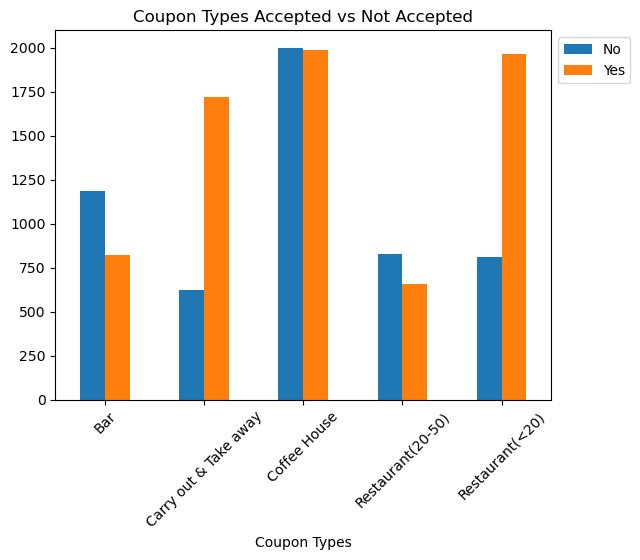

In [150]:
data['coupon'].value_counts()
couponDF=data.groupby('coupon')['accepted_coupon'].value_counts().unstack().reset_index()
couponDF.plot(kind='bar',x='coupon',rot=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Coupon Types Accepted vs Not Accepted')
plt.xlabel('Coupon Types')

6. Use a histogram to visualize the temperature column.

In [151]:
px.histogram(data.query('accepted_coupon=="Yes"')
             ,x='temperature'
             ,color='coupon'
             ,marginal='box'
             ,nbins=10).update_layout(xaxis_title="Temperature", yaxis_title='Count', legend={'title':'Coupon Types'})

From the above histogram of distribution of drivers who have accepted various coupons based on the temperature of the day. From the diagram it is evident that the customers have preferred 'Carry out & Take away' irrespective of the weather. 
1. Majority prefer to accept Bar/Cofee House coupons when the temperatures are higher than 50
2. Drivers prefer to accept Restaurants coupons when the temperature is around 80 and the restaurants are less than 20 mins away.
3. Drivers prefer to stay home and accept Carry out & Take away when the temperatures are around 30, colder temperatures not willing to drive.

In [152]:
px.histogram(data.query('accepted_coupon=="Yes"')
             ,x='coupon'
             ,color='maritalStatus'
             ,marginal='violin'
             ,nbins=10).update_layout(xaxis_title="Coupon Types", yaxis_title='Count', legend={'title':'Marital Status'})

From the above diagram we see that Drivers/Customers based on different marital status accept coupons for different businesses.
1. Single drivers and Drivers with Married/Unmarried Partners compose the majority of the customers who accept coupons.
2. Single drivers prefer to accept coupons for Restaurants 20 mins away, carry out & Take away and coffee houses more compared to other businesses. Please refer to the below diagram.

Data here could be skewed against certain marital status Divorced/widowed based on the count of corresponding drivers captured in the dataset.

In [154]:
px.histogram(data.query('accepted_coupon=="Yes"')
             ,x='maritalStatus'
             ,color='coupon'
             ,marginal='violin'
             ,nbins=10).update_layout(xaxis_title="Marital Status", yaxis_title='Count', legend={'title':'Coupon Types'})

In [155]:
histpx=px.histogram(data.query('accepted_coupon=="Yes"')
             ,x='timeOfTheDay'
             ,color='coupon'
             ,marginal='box'
             ,nbins=10).update_layout(xaxis_title="Time of the Day", yaxis_title='Count', legend={'title':'Coupon Types'})
histpx.update_xaxes(categoryarray=['7AM','10AM','2PM','6PM','10PM'])
histpx.show()

Number of drivers accepting coupons is high around 6 PM and majority of them choose Restaurants less than 20 mins away or Cofee Houses next. While the next highest coupons accepted are around 7 AM where drivers prefer to accept coupons for Coffee House or Carry out & Take away. 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [156]:
bar_data=data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [157]:
# Distribution of accepted coupons for Bar's
px.pie(bar_data.groupby('accepted_coupon')['coupon'].count().reset_index()       
       , title='Proportion of Bar Coupons Accepted'
       , values='coupon'
       , names='accepted_coupon').update_layout(legend={'title':'Coupons Accepted'})

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


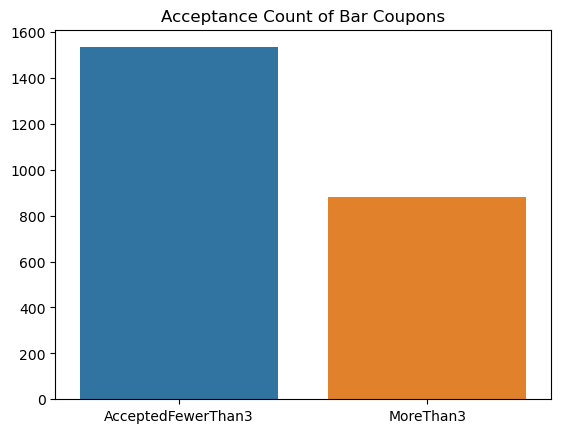

Acceptance rate of customers who went to a bar 3 or fewer times a month : 12.16%
Acceptance rate of customers who went to a bar more than 3 times : 6.99%


In [159]:
# Three or Fewer times only include categorical data with Bar == 1~3. less1 cannot be considered 
# as visitiing even once or less. you are either visitiing the Bar or no.

# never    5197
# less1    3482
# 1~3      2473
# 4~8      1076
# gt8       349
ThreeOrFewerList=['1~3']
MoreThan3=['4~8','gt8']

# Create dataframes for Bar visit times
bar3orfewer_data=data.query('Bar in @ThreeOrFewerList').reset_index()
morethan3_data=data.query('Bar in @MoreThan3').reset_index()

# Create new DataFrame with two new columns where Coupons Accepted 3 or Fewer times and more than 3 times
accepted_bar=bar3orfewer_data.groupby('accepted_coupon')['Bar'].count().reset_index().query('accepted_coupon=="Yes"')
accepted_bar.rename({'Bar':'AcceptedFewerThan3'}, axis=1,inplace=True)
accepted_bar['MoreThan3']=morethan3_data.groupby('accepted_coupon')['Bar'].count().reset_index().query('accepted_coupon=="Yes"')['Bar']

# plot to provide count of Bar coupons accepted 
plt.title('Acceptance Count of Bar Coupons')
sns.barplot(accepted_bar[['AcceptedFewerThan3','MoreThan3']])
plt.show()

# Acceptance rate of Bar coupons compared to the total number of times Bar coupons accepted
bar_rate=(accepted_bar[['AcceptedFewerThan3','MoreThan3']]/len(data)).reset_index()
print('Acceptance rate of customers who went to a bar 3 or fewer times a month : ' + str('{:.2f}%'.format(bar_rate['AcceptedFewerThan3'].iloc[0] * 100)))
print('Acceptance rate of customers who went to a bar more than 3 times : ' + str('{:.2f}%'.format(bar_rate['MoreThan3'].iloc[0] * 100)))


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [171]:
# Bar visits is categorical and does not specifically differentiate between once and more than once(1~3). We will 
# be considering the categorical values '1~3' to fall under customers who have made Bar visits more than once 
# including values '4-8' and 'gt8'

# Bar
# never    5285
# less1    3438
# 1~3      2468
# 4~8      1071
# gt8       348

# age
# 21         2642
# 26         2548
# 31         2019
# 50plus     1781
# 36         1317
# 41         1089
# 46          670
# below21     544

# arrays to hold categorical data
bar_visits_morethan1 = ['1~3','4~8','gt8']
age_gt25 = ['26','31','36','41','46','50plus']

def markDriversWithBarVisitsMoreThan1AndAgeGt25(visit,age):
    if visit in bar_visits_morethan1 and age in age_gt25:
        return 'Yes'
    else:
        return 'No'

bar_data['visits_more_1_age_gt25'] = bar_data.apply(lambda x : markDriversWithBarVisitsMoreThan1AndAgeGt25(visit = x['Bar'], age = x['age']), axis=1)
#bar_data.query('Bar in @bar_visits_morethan1 and age in @age_gt25')

# Pie chart for Acceptance rate of drivers who go to bar more than once and age greater than 25
bar_by_age_pie = px.pie(bar_data.groupby('visits_more_1_age_gt25')['age'].count().reset_index()       
       , title='Acceptance rate of Drivers who go to Bar'
       , values='age'
       , names='visits_more_1_age_gt25').update_layout(legend={'title':'Visit More than once and older than 25'})
bar_by_age_pie.show()

# Histogram showing Acceptance rate of drivers who go to bar more than once or not distributed 
# acorss the different age groups. We can see that the drivers in age group of 21, 31 and 51plus 
# visit bars more than once ccompared to others.
bar_by_age_hist=px.histogram(bar_data.query('age in @age_gt25')
             ,x='age'
             ,color='visits_more_1_age_gt25'
             ,marginal='violin'
             ,labels={}
             ,nbins=10).update_layout(xaxis_title='Age',yaxis_title='Count',legend={'title':'Drivers Visiting Age Greater than 25'})
bar_by_age_hist.update_xaxes(categoryarray=['below21','21','26','31','36','41','46','50plus'])
bar_by_age_hist.show()

# Histogram identifying drivers who went to bar more than once with ages greater than 25 after accepting a coupon
bar_by_age_accepted_hist=px.histogram(bar_data.query('visits_more_1_age_gt25 == "Yes"')
            , x = 'age'
            , color='accepted_coupon'
            , marginal='violin'
            , nbins=10).update_layout(xaxis_title='Age',yaxis_title='Count',legend={'title':'Drivers Visiting and Age Greater than 25, Accepted Coupon?'})
bar_by_age_accepted_hist.update_xaxes(categoryarray=['below21','21','26','31','36','41','46','50plus'])
bar_by_age_accepted_hist.show()

/var/folders/5_/ngc5ywpn49v72l7cy7b1x9rw0000gn/T/ipykernel_21708/792737672.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



From the above pie chart distribution we can see that only 20.9% of people visit bar more than once and are older than 25. 


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [197]:
# arrays to hold categorical data
bar_visits_morethan1 = ['1~3','4~8','gt8']
passenger_not_kid = ['Alone','Friend(s)','Partner']
occupations_fff=['Farming Fishing & Forestry']

# Create new dataframe based on the categorical data where drivers who go to bars more than once a month,
# had passengers that were not a kid and had occupations other than Farming, Fishing or Forestry
bar_data2 = bar_data.query('Bar in @bar_visits_morethan1 and passenger in @passenger_not_kid and occupation not in @occupations_fff')

# Pie chart for Acceptance rate of drivers who go to bar more than once and had passengers that were not a kid 
# with occupations other than Farming, Fishing or Forestry
bar_data2_pie = px.pie(bar_data2.groupby('accepted_coupon')['coupon'].count().reset_index()       
       , title='Drivers who go to Bar More than once, Passenger not a kid and Occupation not Fishing, Farming or Forestry'
       , values='coupon'
       , names='accepted_coupon').update_layout(legend={'title':'Accepted coupon'})
bar_data2_pie.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [208]:
# arrays to hold categorical data
bar_visits_morethan1 = ['1~3','4~8','gt8']
passenger_not_kid = ['Alone','Friend(s)','Partner']
age_under_30=['below21','21','26']
bar_visits_morethan4 = ['4~8','gt8']
income_under_50k=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

# 1. go to bars more than once a month, had passengers that were not a kid, and were not widowed

# Create new dataframe based on the categorical data where drivers who go to bars more than once a month,
# had passengers more that were not a kid and not widowed
bar_data2 = bar_data.query('Bar in @bar_visits_morethan1 and passenger in @passenger_not_kid and maritalStatus != "Widowed"')

# Pie chart for Acceptance rate
bar_data2_pie = px.pie(bar_data2.groupby('accepted_coupon')['coupon'].count().reset_index()       
       , title='1. Drivers who go to Bar More than once, Passenger not a kid and not Widowed'
       , values='coupon'
       , names='accepted_coupon').update_layout(legend={'title':'Accepted coupon'})
bar_data2_pie.show()

# 2. go to bars more than once a month and are under the age of 30
bar_data3=bar_data.query('Bar in @bar_visits_morethan1 and age in @age_under_30')

# Pie chart for Acceptance rate
bar_data3_pie = px.pie(bar_data3.groupby('accepted_coupon')['coupon'].count().reset_index()       
       , title='2. Drivers who go to Bar More than once under age 30'
       , values='coupon'
       , names='accepted_coupon').update_layout(legend={'title':'Accepted coupon'})
bar_data3_pie.show()

# 3.go to cheap restaurants more than 4 times a month and income is less than 50K
# As the data does not price the cost of the orders placed, Cheap restaurants can be identified as Restaurants 
# which are located less than 20 mins away
                        
bar_data4=data.query('coupon == "Restaurant(<20)" and Bar in @bar_visits_morethan4 and income in @income_under_50k')

# Pie chart for Acceptance rate
bar_data4_pie = px.pie(bar_data4.groupby('accepted_coupon')['coupon'].count().reset_index()       
       , title='2. Drivers go to cheap restaurants more than 4 times a month and income is less than 50K'
       , values='coupon'
       , names='accepted_coupon').update_layout(legend={'title':'Accepted coupon'})
bar_data4_pie.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. Drivers choose to mostly accept coupons for 'Coffee House', 'Restaurant less than 20 mins away' 
   or 'Carry out & Take Away'
2. Majority prefer to accept Bar/Cofee House coupons when the temperatures are higher than 50
3. Drivers prefer to accept Restaurants coupons when the temperature is around 80 and the restaurants 
   are less than 20 mins away.
4. Drivers prefer to stay home and accept Carry out & Take away when the temperatures are around 30, 
   colder temperatures not willing to drive.
5. Acceptance rate of customers who went to a bar 3 or fewer times a month is 12.16% compared to customers 
   who went to a bar more than 3 times is 6.99%
6. Only 20.9% of Drivers visit bar more than once and are older than 25
7. acceptance rate between drivers who go to bars more than once a month, had passengers that were not a kid 
   and had occupations other than farming, fishing, or forestry is 71.3% compared to all Drivers who have 
   accepted Bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  